In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
pd.set_option('mode.chained_assignment', None)
import geopandas as gpd

In [41]:
df = pd.read_csv("/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/data.csv",index_col = 0)

In [95]:
# Oceanic divide
time = pd.DatetimeIndex(df["time"].unique())
indian_ocean = df[(df["lat"] < 8) & (df["sla"].isnull() == False)]
arabian_sea = df[(df["lat"] > 8) & (df["lon"] < 77.5) & (df["sla"].isnull() == False)]
bay_bangal = df[(df["lat"] > 8) & (df["lon"] > 77.5) & (df["sla"].isnull() == False)]

s1 = indian_ocean["sla"].groupby(pd.DatetimeIndex(indian_ocean['time'])).mean()
s2 = arabian_sea["sla"].groupby(pd.DatetimeIndex(arabian_sea['time'])).mean()
s3 = bay_bangal["sla"].groupby(pd.DatetimeIndex(bay_bangal['time'])).mean()

In [96]:
# Land Divide

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']))
region1 = gpd.read_file('region1.geojson')
region2 = gpd.read_file('region2.geojson')
region3 = gpd.read_file('region3.geojson')
region4 = gpd.read_file('region4.geojson')

In [97]:
mask_region1 = (region1.loc[0, 'geometry'])
mask_region2 = (region2.loc[0, 'geometry'])
mask_region3 = (region3.loc[0, 'geometry'])
mask_region4 = (region4.loc[0, 'geometry'])
gdf.loc[:,'region1'] = gdf.within(mask_region1)
gdf.loc[:,'region2'] = gdf.within(mask_region2)
gdf.loc[:,'region3'] = gdf.within(mask_region3)
gdf.loc[:,'region4'] = gdf.within(mask_region4)

In [98]:
r1 = pd.DataFrame(gdf[gdf["region1"] == True])
r2 = pd.DataFrame(gdf[gdf["region2"] == True])
r3 = pd.DataFrame(gdf[gdf["region3"] == True])
r4 = pd.DataFrame(gdf[gdf["region4"] == True])

In [99]:
r1_precip = r1["precip"].groupby(pd.DatetimeIndex(r1['time'])).mean()
r2_precip = r2["precip"].groupby(pd.DatetimeIndex(r2['time'])).mean()
r3_precip = r3["precip"].groupby(pd.DatetimeIndex(r3['time'])).mean()
r4_precip = r4["precip"].groupby(pd.DatetimeIndex(r4['time'])).mean()

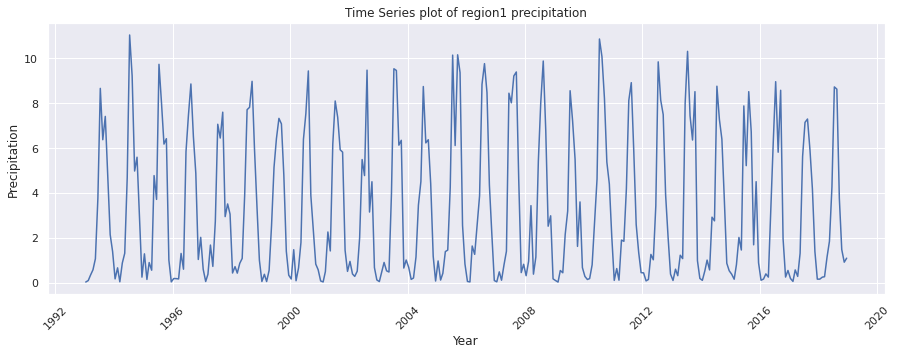

In [100]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(time,r1_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region1 precipitation')
plt.show()

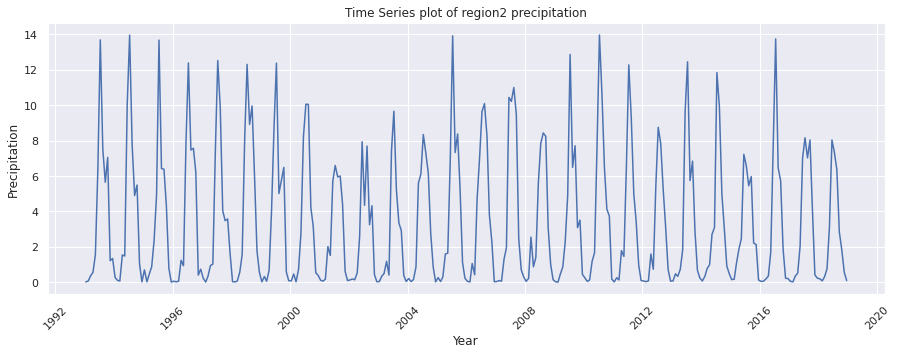

In [101]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(time,r2_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region2 precipitation')
plt.show()

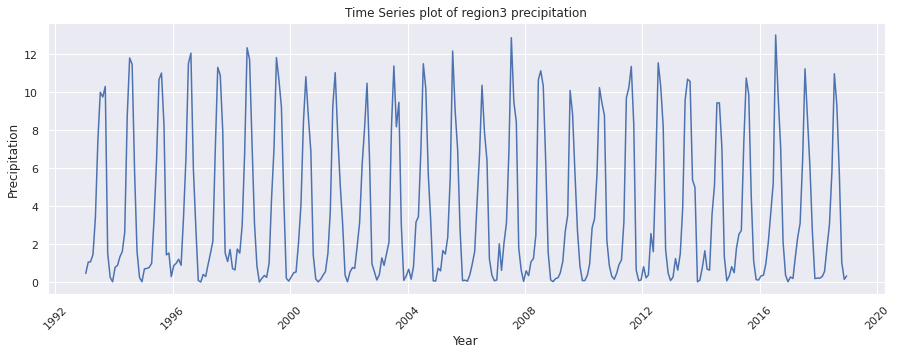

In [102]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(time,r3_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region3 precipitation')
plt.show()

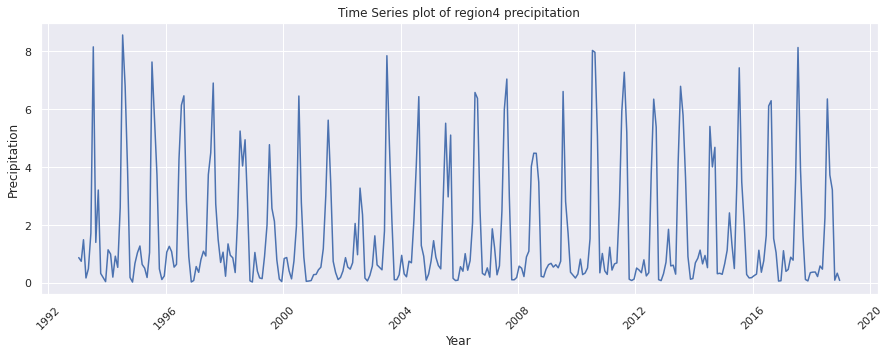

In [103]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(time,r4_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region4 precipitation')
plt.show()

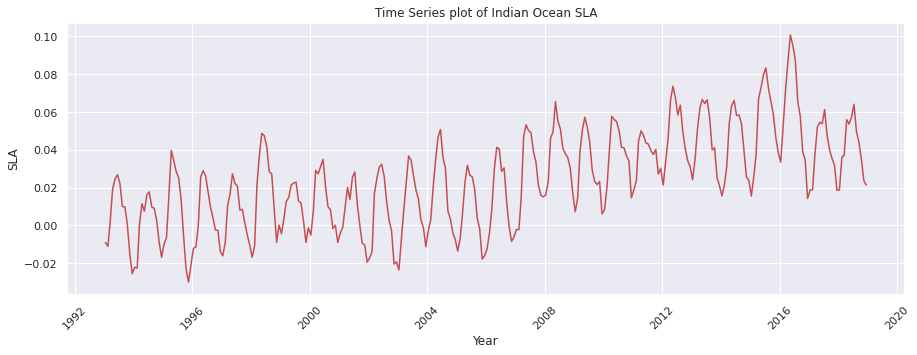

In [105]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(time,s1, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Indian Ocean SLA')
plt.show()

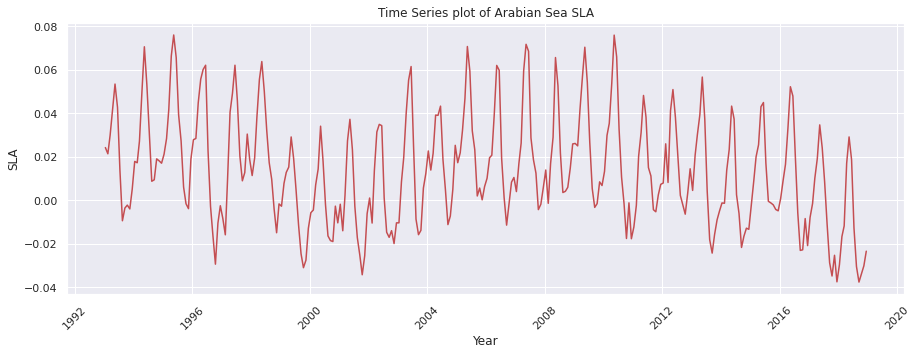

In [106]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(time,s2, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Arabian Sea SLA')
plt.show()

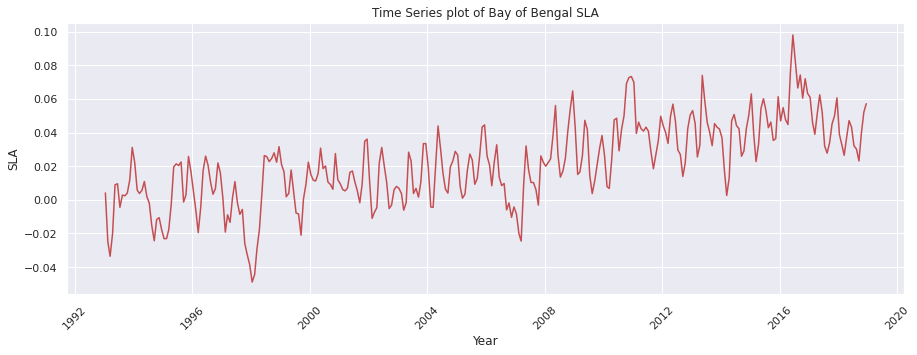

In [107]:
fig,ax = plt.subplots(figsize=(15,5))

plt.plot(time,s3, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Bay of Bengal SLA')
plt.show()

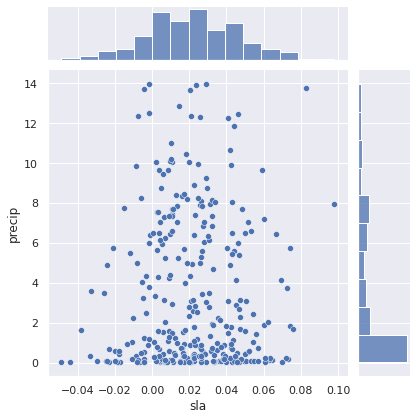

In [115]:
sns.jointplot(y=r2_precip,x=s3)